# Machine learning model #1 - Random Forest

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('study_performance.csv')
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# Remove the columns that are not relevant to our goal
df = df.drop(['gender', 'race_ethnicity', 'lunch'], axis=1)

In [4]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental_level_of_education  1000 non-null   object
 1   test_preparation_course      1000 non-null   object
 2   math_score                   1000 non-null   int64 
 3   reading_score                1000 non-null   int64 
 4   writing_score                1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [5]:
# Show the revisited table
df.head(10)

,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,bachelor's degree,none,72,72,74
1,some college,completed,69,90,88
2,master's degree,none,90,95,93
3,associate's degree,none,47,57,44
4,some college,none,76,78,75
5,associate's degree,none,71,83,78
6,some college,completed,88,95,92
7,some college,none,40,43,39
8,high school,completed,64,64,67
9,high school,none,38,60,50


In [6]:
# The feature "test_preparation_course" contains string values ('completed' or 'none'), which the Random Forest model can't handle
# The model expects only numeric inputs, so we need to create dummies or in this case, I prefer to assing '1' to 'completed' and '0' to 'none':
df['test_preparation_course'] = df['test_preparation_course'].map({'completed': 1, 'none': 0})

In [7]:
# Show the revisited table
df.head(10)

,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,bachelor's degree,0,72,72,74
1,some college,1,69,90,88
2,master's degree,0,90,95,93
3,associate's degree,0,47,57,44
4,some college,0,76,78,75
5,associate's degree,0,71,83,78
6,some college,1,88,95,92
7,some college,0,40,43,39
8,high school,1,64,64,67
9,high school,0,38,60,50


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation and Model Building

In [8]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [9]:
# Putting feature variable to X
X = df.drop('parental_level_of_education',axis=1)

# Putting response variable to y
y = df['parental_level_of_education']

# Split dataset into training set and test set (20% test size)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=1)

### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters

In [10]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [11]:
# fit (20% test size)
rfc.fit(X_train_20,y_train_20)

RandomForestClassifier()

In [12]:
# Making predictions (20% test size)
predictions = rfc.predict(X_test_20)

In [13]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [14]:
# Let's check the report of our default model (20% test size)
print(classification_report(y_test_20,predictions))

                    precision    recall  f1-score   support

associate's degree       0.21      0.32      0.25        38
 bachelor's degree       0.17      0.06      0.09        33
       high school       0.23      0.24      0.23        37
   master's degree       0.00      0.00      0.00         9
      some college       0.22      0.22      0.22        49
  some high school       0.21      0.21      0.21        34

          accuracy                           0.20       200
         macro avg       0.17      0.18      0.17       200
      weighted avg       0.20      0.20      0.19       200



Since the values are not good, I will try to improve them by reducing the 6 classes to only 2:
- Group 1: degrees
- Group 2: school and college

In [15]:
# Reducing the classes from 6 to only 2:
mapping = {
    "associate's degree": 1,  # Group 1
    "bachelor's degree": 1,   # Group 1
    "master's degree": 1,     # Group 1
    "high school": 0,         # Group 2
    "some college": 0,        # Group 2
    "some high school": 0     # Group 2
}

# Apply the mapping to create the new binary target variable
df['level_of_education'] = df['parental_level_of_education'].map(mapping)
# Dropping the original column
df = df.drop(['parental_level_of_education'], axis=1)

In [16]:
# Show the revisited table
df.head(10)

,test_preparation_course,math_score,reading_score,writing_score,level_of_education
0,0,72,72,74,1
1,1,69,90,88,0
2,0,90,95,93,1
3,0,47,57,44,1
4,0,76,78,75,0
5,0,71,83,78,1
6,1,88,95,92,0
7,0,40,43,39,0
8,1,64,64,67,0
9,0,38,60,50,0


In [17]:
# Putting feature variable to X
X = df.drop('level_of_education',axis=1)

# Putting response variable to y
y = df['level_of_education']

# Split dataset into training set and test set (20% test size)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=1)

# Split dataset into training set and test set (25% test size)
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=1)

# Split dataset into training set and test set (30% test size)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [19]:
# fit (20% test size)
rfc.fit(X_train_20,y_train_20)

# Making predictions
predictions = rfc.predict(X_test_20)

# Let's check the report of our default model
print(classification_report(y_test_20,predictions))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       120
           1       0.45      0.35      0.39        80

    accuracy                           0.57       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.55      0.57      0.56       200



In [20]:
# fit (25% test size)
rfc.fit(X_train_25,y_train_25)

# Making predictions
predictions = rfc.predict(X_test_25)

# Let's check the report of our default model
print(classification_report(y_test_25,predictions))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       153
           1       0.46      0.40      0.43        97

    accuracy                           0.58       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.57      0.58      0.58       250



In [21]:
# fit (30% test size)
rfc.fit(X_train_30,y_train_30)

# Making predictions
predictions = rfc.predict(X_test_30)

# Let's check the report of our default model
print(classification_report(y_test_30,predictions))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       181
           1       0.49      0.45      0.47       119

    accuracy                           0.60       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.59      0.60      0.59       300



Apparently, the idea of grouping was useful as the values make now more sense.
We obtain the best results with the following combination: 75% training set & 25% test set

## Hyperparameter Tuning
### Tuning max_depth
Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [22]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV - considering the size of the dataset I would go with 5
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 21, 2)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_25, y_train_25)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 21, 2)}, scoring='accuracy')

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.242068,0.031580,0.019155,0.006084,1,{'max_depth': 1},0.666667,0.620000,0.633333,0.593333,0.613333,0.625333,0.024368,1
1,0.217148,0.027384,0.017282,0.007819,3,{'max_depth': 3},0.680000,0.620000,0.620000,0.600000,0.593333,0.622667,0.030580,2
2,0.244897,0.038681,0.019900,0.005075,5,{'max_depth': 5},0.653333,0.613333,0.606667,0.593333,0.593333,0.612000,0.022071,3
3,0.291617,0.041611,0.026193,0.010747,7,{'max_depth': 7},0.620000,0.613333,0.600000,0.573333,0.586667,0.598667,0.017075,4
4,0.250268,0.034541,0.012501,0.006251,9,{'max_depth': 9},0.626667,0.593333,0.600000,0.533333,0.593333,0.589333,0.030580,5


After this analysis, we can see as we obtain the best values when max depth = 3.

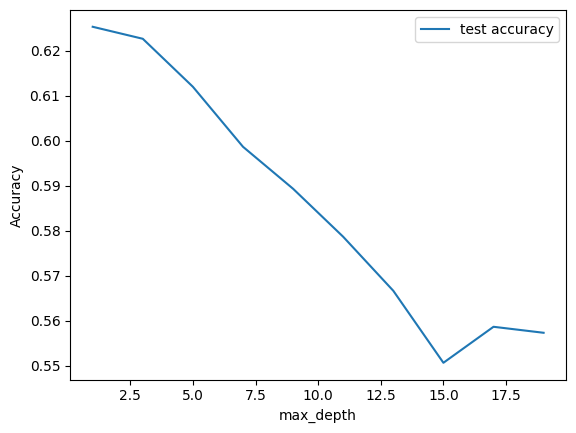

In [24]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Also on the chart we can see that the accuracy score increases until max_depth = 3 and after it starts to decrease.

## Grid Search to Find Optimal Hyperparameters

In [25]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1, 3, 5],
    'min_samples_leaf': range(50, 200, 100),
    'min_samples_split': range(100, 250, 100),
    'n_estimators': [50, 100, 200], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1,verbose = 1)

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train_25, y_train_25)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5], 'max_features': [5, 10],
                         'min_samples_leaf': range(50, 200, 100),
                         'min_samples_split': range(100, 250, 100),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [27]:
# printing the best accuracy score and hyperparameters
print('The best value of accuracy we can get is',grid_search.best_score_,'using the following hyperparameters combination ->',grid_search.best_params_)

The best value of accuracy we can get is 0.614617703948117 using the following hyperparameters combination -> {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 100}


In [28]:
# Fitting the final model with the best parameters obtained from grid search
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=50, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [29]:
# fit
rfc.fit(X_train_25,y_train_25)

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=50,
                       min_samples_split=200)

In [30]:
# predict
predictions = rfc.predict(X_test_25)

In [31]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test_25,predictions))

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       153
           1       0.49      0.23      0.31        97

    accuracy                           0.61       250
   macro avg       0.56      0.54      0.52       250
weighted avg       0.58      0.61      0.56       250



In [33]:
print(confusion_matrix(y_test_25,predictions))

[[130  23]
 [ 75  22]]


TP (True Positives) = 130 /
TN (True Negatives) = 23 /
FP (False Positives) = 23 /
FN (False Negatives) = 74

Now we calculate the overall accuracy:

In [34]:
print ("Overall accuracy ->", (130+23)/(130+23+23+74))

Overall accuracy -> 0.612


# Machine learning model #2 - KNN (K-Nearest Neighbors)

For this algorithm I consider a number of neighbors equal to 3, so k = 3.

In [35]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model
kNN.fit(X_train_25, y_train_25)

# Predict the response for test dataset
y_pred_25 = kNN.predict(X_test_25)

Print the estimation of the model's accuracy on predicting the level of education.
We do this by comparing actual test set values and predicted values.

In [36]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_25, y_pred_25)) )

Accuracy: 0.59


#### Confusion Matrix
Thanks to the confusion matrix, we can describe the performance of our model based on the test data for which the true values or labels are known.

<Axes: >

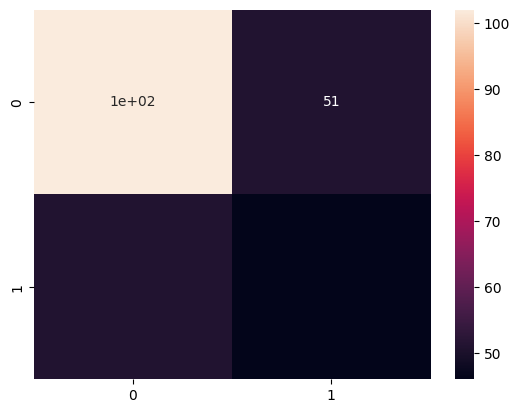

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict_25 = kNN.predict(X_test_25)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test_25, y_predict_25)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

Let's produce the classification report so that we can identify the misclassified classes in much more detail by giving precision, recall and F1 score for each class.

In [38]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test_25, y_predict_25))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       153
           1       0.47      0.47      0.47        97

    accuracy                           0.59       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.59      0.59      0.59       250



### Hyperparameters
In order to improve our accuracy, we have to evaluate the best value for the hyperparameter k (number of neighbors).
So we will train and test our model with 10 different k values and finally use the one which gives us the best level of accuracy.

We initialize a new variable called "neighbors" which will have values ranging from 1 to 20 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. We will need them later to plot a graph and choose the best neighbor value.

In [39]:
import numpy as np
neighbors = np.arange(1, 31)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

In [40]:
print(neighbors, train_accuracy, test_accuracy)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


Now we have to enumerate over all the possible neighbor values and for each neighbor we predict both training and testing data. Finally, we store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [41]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3.. k
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train_25, y_train_25)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train_25, y_train_25)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test_25, y_test_25)           # Save the score value in the train_accuracy array

We plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. Now we can choose the specific k value at which our model performs the best.

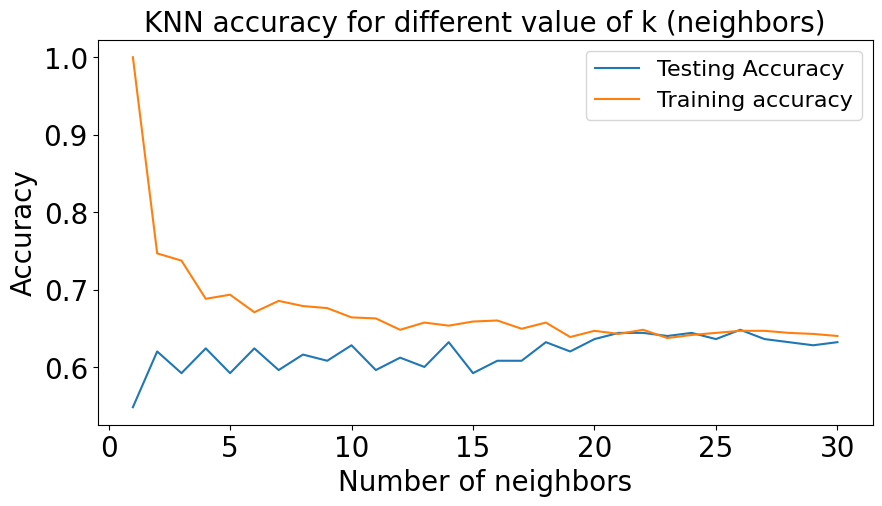

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.title('KNN accuracy for different value of k (neighbors)', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 16})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [43]:
# So we can obtain the best level of accuracy if we consider a level of k (neighbors) equal to 26.
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 26)

# Train the model
kNN.fit(X_train_25, y_train_25)

# Predict the response for test dataset
y_pred_25 = kNN.predict(X_test_25)

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_25, y_pred_25)) )

Accuracy: 0.65


So, thanks to the hyperparameter tuning we achieved our goal which was improving the accuracy of the model, moving from 0.59 to 0.65.
Now, I will try to improve these results, working on a new column thanks to feature engineering. My idea is to calculate for each student, the average score between math, reading and writing. Then I will replace those 3 variables with only the new one.

In [44]:
# Create a new column named 'average_score' and compute the mean across columns
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Display the updated DataFrame
df.head(10)

,test_preparation_course,math_score,reading_score,writing_score,level_of_education,average_score
0,0,72,72,74,1,72.666667
1,1,69,90,88,0,82.333333
2,0,90,95,93,1,92.666667
3,0,47,57,44,1,49.333333
4,0,76,78,75,0,76.333333
5,0,71,83,78,1,77.333333
6,1,88,95,92,0,91.666667
7,0,40,43,39,0,40.666667
8,1,64,64,67,0,65.000000
9,0,38,60,50,0,49.333333


In [45]:
# Putting feature variable to X
X = df.drop(['level_of_education', 'math_score', 'reading_score', 'writing_score'],axis=1)

# Putting response variable to y
y = df['level_of_education']

# Splitting the data into train and test
X_train_25B, X_test_25B, y_train_25B, y_test_25B = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 26)

# Train the model using the training sets
kNN.fit(X_train_25B, y_train_25B)

# Predict the response for test dataset
y_pred_25B = kNN.predict(X_test_25B)

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_25B, y_pred_25B)) )

Accuracy: 0.62


In [47]:
import numpy as np
neighbors = np.arange(1, 31)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

In [48]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ... k
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train_25B, y_train_25B)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train_25B, y_train_25B)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test_25B, y_test_25B)           # Save the score value in the train_accuracy array

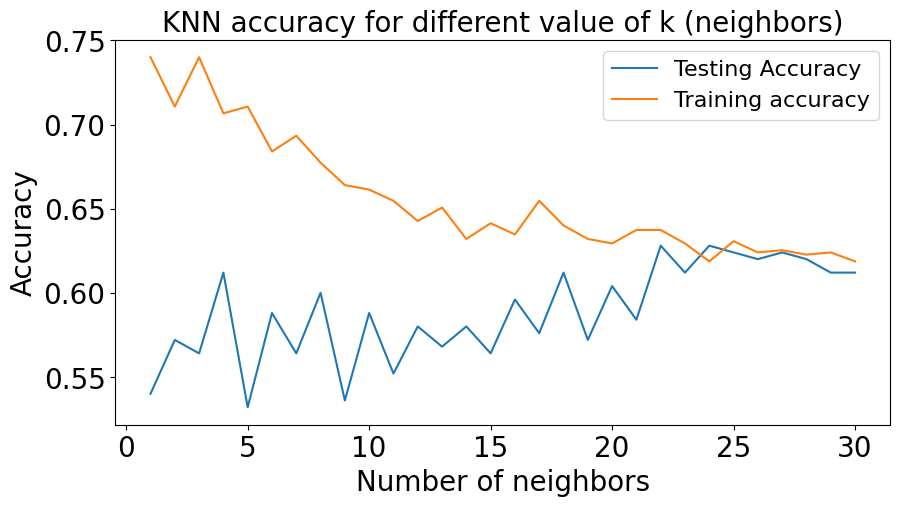

In [49]:
plt.figure(figsize = (10, 5))
plt.title('KNN accuracy for different value of k (neighbors)', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 16})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Looking at the chart, the new best value of neighbors is not 26 anymore but 22.
The accuracy level is calculated below:

In [50]:
# Update KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 22)

# Train the model using the training sets
kNN.fit(X_train_25B, y_train_25B)

# Predict the response for test dataset
y_pred_25B = kNN.predict(X_test_25B)

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_25B, y_pred_25B)) )

Accuracy: 0.63


Apparently, the previous model was performing better (0.65 vs. 0.63), so we should rely on the first one.